In [29]:
"""
Importing libraries
"""
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import serial

In [30]:
"""
Loading the pre-trained model
"""
new_model = tf.keras.models.load_model('./saved_model_4')
"""
Establishing serial communication with microcontroller
"""
controller = serial.Serial('COM3', 9600, timeout=1)

In [31]:
"""
Summary of the neural network model
"""
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                7744      
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,969
Trainable params: 11,969
Non-trainable params: 0
_________________________________________________________________


In [32]:
"""
Loading evaluation dataset to test network accuracy
"""
dfeval_p = pd.read_csv("./data/datos_test_12_horas_corr.csv")
y_eval_p = dfeval_p.pop('POWER_12')

329/329 [==============================] - 1s 2ms/step


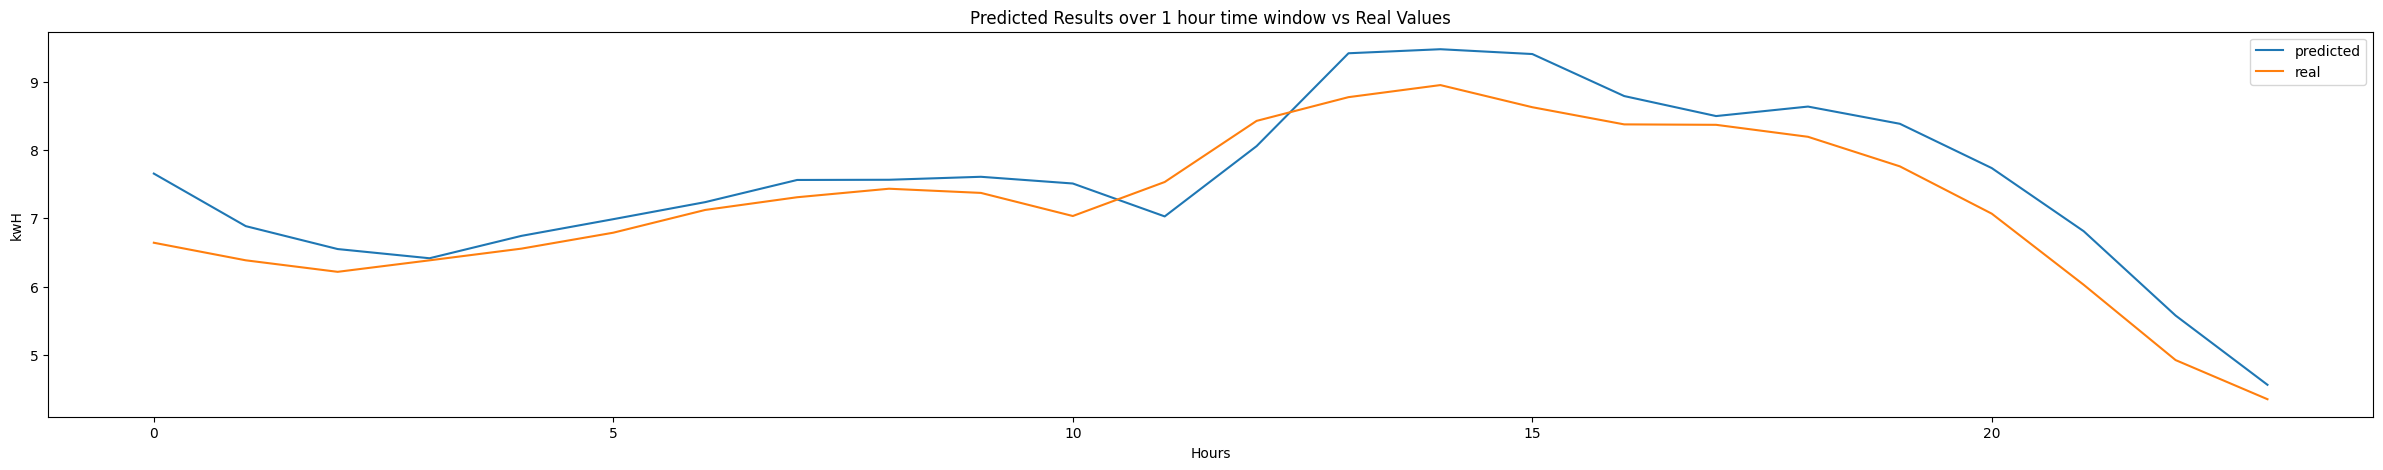

In [33]:
"""
Tracking prediction. One hour only per prediction
"""
test_predictions = new_model.predict(dfeval_p).flatten()
plt.plot(test_predictions[:24])
plt.plot(y_eval_p[:24])
plt.title('Predicted Results over 1 hour time window vs Real Values')
plt.xlabel('Hours')
plt.ylabel('kwH')
plt.legend(["predicted","real"])
plt.show()

(10519, 120)
10519
1/1 [==============================] - 0s 82ms/step
[6.2410216]
[6.24102163]
1/1 [==============================] - 0s 30ms/step
[5.75189304]
1/1 [==============================] - 0s 33ms/step
[4.36273766]
1/1 [==============================] - 0s 31ms/step
[3.21312284]
1/1 [==============================] - 0s 30ms/step
[2.79171228]
1/1 [==============================] - 0s 29ms/step
[3.00194383]
1/1 [==============================] - 0s 35ms/step
[3.34668732]
1/1 [==============================] - 0s 30ms/step
[3.41147256]
1/1 [==============================] - 0s 32ms/step
[3.12655449]
1/1 [==============================] - 0s 33ms/step
[2.61049724]
1/1 [==============================] - 0s 31ms/step
[2.06273174]
1/1 [==============================] - 0s 29ms/step
[1.68910325]
1/1 [==============================] - 0s 30ms/step
[1.66070032]
1/1 [==============================] - 0s 32ms/step
[2.03880048]
1/1 [==============================] - 0s 30ms/step
[2.6169

C:\Users\hurta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
C:\Users\hurta\AppData\Local\Temp\ipykernel_10676\4280152768.py:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mse = np.square(np.subtract(y_eval_p_test,results)).mean()


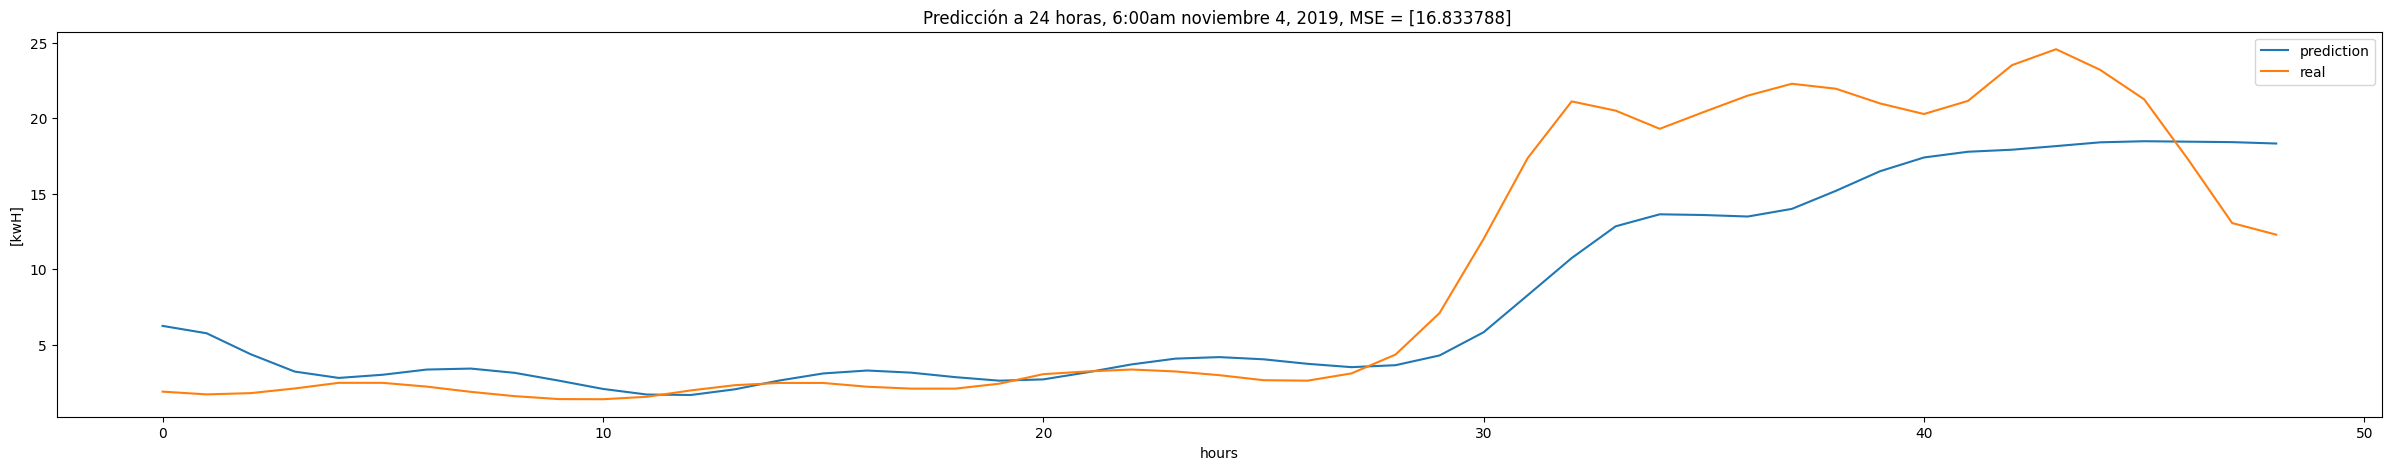

In [34]:
"""
Time Window replicatibilty testing
"""
print(np.shape(dfeval_p))
list_array_p = np.array(dfeval_p)
print(len(list_array_p))
list_array_p2 = np.reshape(list_array_p,(len(list_array_p),120))
list_array = np.reshape(list_array_p[109][:],(1,120))
prediction = new_model.predict(list_array)
prediction = np.reshape(prediction,1)
print(prediction)
results = [prediction]

for index in range(7381,(7381+48)):
    list_array = list_array[0][10:] 
    list_array_annex = list_array_p2[index+1][110:119]
    list_array_prediction = np.reshape(([float(prediction)]),(1)) 
    print(list_array_prediction)

    list_array_final = np.append(list_array,list_array_annex)
    list_array_final = np.append(list_array_final,list_array_prediction)
    list_array = np.reshape(list_array_final,(1,120))
    prediction = new_model.predict(list_array)
    prediction = np.reshape(prediction,1)
    results.append(float(prediction))
    
#real data
y_eval_p_test = (np.array(y_eval_p))
y_eval_p_test = np.reshape(y_eval_p_test,(len(y_eval_p)))
y_eval_p_test = y_eval_p_test[7381:(7381+49)]
print(len(y_eval_p_test))
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(results)
plt.plot(y_eval_p_test)
plt.legend(['prediction','real'])
mse = np.square(np.subtract(y_eval_p_test,results)).mean()
plt.title(f'Predicción a 24 horas, 6:00am noviembre 4, 2019, MSE = {mse} ')
plt.xlabel('hours')
plt.ylabel('[kwH]')
plt.show()

In [35]:
"""
MONITOR CONTROL DISPLAY FOR TAGS CONTROL
"""

"""
Importing Dependencies
"""
import tkinter as tk
try:
    controller = serial.Serial('COM3', 9600, timeout=1)
except:
    pass

"""
Defining variables
"""
pot = 0
ventana = tk.Tk()
ventana.geometry("1000x650")
ventana.title("Datos del sistema de generación")
fuente = 'Arial'
tamanol = 10
flag_diesel = 1
flag_wind = 1
carriage_return = b'\n'
results_demand = []
results_battery = []
results_wind = []
results_diesel = []
results_prediction = []

"""
Labels definition for input data
"""
label0 = tk.Label(ventana, text="Datos del Procesamiento", font=(fuente, 18))
label0.pack(pady=20)

marco = tk.Frame(ventana)
marco.pack()
marco.columnconfigure(0, weight=1)
marco.columnconfigure(1, weight=1)
marco.columnconfigure(2, weight=1)
marco.columnconfigure(3, weight=1)
marco.columnconfigure(4, weight=1)
marco.columnconfigure(5, weight=1)

label1 = tk.Label(marco, text="Humedad Específica a 2m", font=(fuente, tamanol))
label1.grid(row=0, column=0, padx=6, pady=6)
label2 = tk.Label(marco, text="Humedad Relativa a 2m", font=(fuente, tamanol))
label2.grid(row=0, column=1, padx=6, pady=6)
label3 = tk.Label(marco, text="Precipitación", font=(fuente, tamanol))
label3.grid(row=0, column=2, padx=6, pady=6)
label4 = tk.Label(marco, text="Velocidad del viento a 10m", font=(fuente, tamanol))
label4.grid(row=0, column=3, padx=6, pady=6)
label5 = tk.Label(marco, text="Dirección del viento a 10m", font=(fuente, tamanol))
label5.grid(row=0, column=4, padx=6, pady=6)
label6 = tk.Label(marco, text="Temperatura a 2m", font=(fuente, tamanol))
label6.grid(row=2, column=0, padx=6, pady=6)
label7 = tk.Label(marco, text="Temperatura de Bulbo Humedo a 2m", font=(fuente, tamanol))
label7.grid(row=2, column=1, padx=6, pady=6)
label8 = tk.Label(marco, text="Presión Atmosférica", font=(fuente, tamanol))
label8.grid(row=2, column=2, padx=6, pady=6)
label9 = tk.Label(marco, text="Temperatura de rocío a 2m", font=(fuente, tamanol))
label9.grid(row=2, column=3, padx=6, pady=6)
label10 = tk.Label(marco, text="DIA - CELDA", font=(fuente, tamanol))
label10.grid(row=2, column=4, padx=6, pady=6)

label30 = tk.Label(marco, text="Hora", font=(fuente, tamanol))
label30.grid(row=4, column=0, padx=6, pady=6)
label31 = tk.Label(marco, text="Porcentaje de baterías", font=(fuente, tamanol))
label31.grid(row=4, column=1, padx=6, pady=6)

marco.pack(fill='x')

"""
Obtaining data from inputs
"""
input0 = tk.Entry(marco)
input0.grid(row=1, column=0, padx=6, pady=6)
input1 = tk.Entry(marco)
input1.grid(row=1, column=1, padx=6, pady=6)
input2 = tk.Entry(marco)
input2.grid(row=1, column=2, padx=6, pady=6)
input3 = tk.Entry(marco)
input3.grid(row=1, column=3, padx=6, pady=6)
input4 = tk.Entry(marco)
input4.grid(row=1, column=4, padx=6, pady=6)
input5 = tk.Entry(marco)
input5.grid(row=3, column=0, padx=6, pady=6)
input6 = tk.Entry(marco)
input6.grid(row=3, column=1, padx=6, pady=6)
input7 = tk.Entry(marco)
input7.grid(row=3, column=2, padx=6, pady=6)
input8 = tk.Entry(marco)
input8.grid(row=3, column=3, padx=6, pady=6)
input9 = tk.Entry(marco)
input9.grid(row=3, column=4, padx=6, pady=6)

input30 = tk.Entry(marco)
input30.grid(row=5, column=0, padx=6, pady=6)
input31 = tk.Entry(marco)
input31.grid(row=5, column=1, padx=6, pady=6)

"""
Extracting values from inputs already introduced
"""
def extraer():
    """
    FUNCION PARA EXTRAER LOS DATOS DESDE PANTALLA
    """
    try:
        qv2m = float (input0.get()) #humedad especifica
        rh2m = float(input1.get()) #humedad relativa
        precto = float(input2.get()) #precipitacion
        ws10m = float(input3.get()) #velocidad del viento
        wd10m = float(input4.get()) #direccion del viento
        t2m = float(input5.get()) #temperatura
        t2mwet = float(input6.get()) #temperatura bulbo humedo
        ps = float(input7.get()) # presion atmosferica
        t2mdew = float(input8.get()) #temperatura de rocio
        eliminar = int(input9.get()) #FIXME: Eliminar este campo.
        hor = int(input30.get()) #hora del dia
        bat = float(input31.get()) #carga de bateria
        potencia_teorica = 0.5*((ps/100)*28.9645/(0.0821*(t2m+273.15)))*75.42964*(ws10m)*(ws10m)*(ws10m)*0.48/1000
        list_to_predict = np.array([qv2m,rh2m,precto,ws10m,wd10m,t2m,t2mwet,ps,t2mdew,potencia_teorica])
        list_array_simu = list_array_p2[0][10:]
        list_array = np.append(list_array_simu,list_to_predict)
        list_array = np.reshape(list_array,(1,120))
        prediccion_potencia = new_model.predict(list_array)
        prediccion_potencia = new_model.predict(list_array*3) #SE MULTIPLICA POR 2 POR EL NUMERO DE TURBINAS.
        pot = float(prediccion_potencia)
        label13.config(text=pot) #MUESTRA PREDICCIÓN DE POTENCIA EN PANTALLA

        demanda_promedio = 3
        demanda_hora = np.array([0.83,0.76,0.75,0.67,0.64,0.63,0.73,0.87,1.03,1.1,1.17,1.2,1.21,1.26,1.28,1.23,1.17,1.13,1.16,1.18,1.13,1.08,0.95,0.85])*demanda_promedio
        
        if (bat>=60):
            flag_diesel = 0
            flag_wind = 0
        elif((((pot*2)+(demanda_promedio*bat/100)))>demanda_hora[hor]):
            flag_wind = 1
            flag_diesel = 0#
        elif((((pot*2)+(demanda_promedio*bat/100)))<demanda_hora[hor]):
            flag_wind = 0#
            flag_diesel = 1

        """
        Storing data for later plotting
        """
        results_demand.append(demanda_hora[hor])
        results_battery.append(bat)
        results_diesel.append(flag_diesel)
        results_wind.append(flag_wind)
        results_prediction.append(((pot*2)+(demanda_promedio*bat/100)))

        """Diesel Generator"""
        if (flag_diesel == 1):
            label17.config(text="Encendido", font=(fuente, tamanol), bg="green")
            controller.write(b'1'+carriage_return)
        elif (flag_diesel == 0):
            label17.config(text="Apagado", font=(fuente, tamanol), bg="red")
            controller.write(b'0'+carriage_return)

        """Wind generators"""
        if (flag_wind == 1):
            label19.config(text="Encendido", font=(fuente, tamanol), bg="blue")
            controller.write(b'2'+carriage_return)
        elif (flag_wind == 0):
            label19.config(text="Apagado", font=(fuente, tamanol), bg="red")
            controller.write(b'3'+carriage_return)
    except ValueError:
        pass

# Botón
boton = tk.Button(ventana, text="Introducir Datos", relief="groove", borderwidth=6, font=(fuente, 18), command=extraer)
boton.pack(pady=40)

# Display
label11 = tk.Label(ventana, text="Datos obtenidos", font=(fuente, 18))
label11.pack()
marco2 = tk.Frame(ventana)
marco2.pack(pady=10)
label12 = tk.Label(marco2, text="Predicción de potencia a una hora: ", font=(fuente, tamanol))
label12.grid(row=0, column=0, sticky='e')
label13 = tk.Label(marco2, text="  ", font=(fuente, tamanol))
label13.grid(row=0, column=1, sticky='w')
label14 = tk.Label(marco2, text="Watts", font=(fuente, tamanol))
label14.grid(row=0, column=2, sticky='w')

#Condiciones de la generacíon
label15 = tk.Label(ventana, text="Condiciones de la generacíon", font=(fuente, 18))
label15.pack(pady=10)
marco3 = tk.Frame(ventana)
marco3.pack()

label16 = tk.Label(marco3, text="Generador diésel", font=(fuente, tamanol))
label16.grid(row=0, column=0, padx=10)

label17 = tk.Label(marco3, text="Apagado", font=(fuente, tamanol), bg="red")
label17.grid(row=1, column=0, ipadx=6, ipady=6)

label18 = tk.Label(marco3, text="Aerogeneradores", font=(fuente, tamanol))
label18.grid(row=0, column=1, padx=10)

label19 = tk.Label(marco3, text="Apagado", font=(fuente, tamanol), bg="red")
label19.grid(row=1, column=1, ipadx=6, ipady=6)

ventana.mainloop()
controller.write(b'0'+carriage_return)
controller.write(b'3'+carriage_return)

"Graphing Results"
results_to_plot =[results_battery,results_demand,results_prediction]
titles =['battery [%]','demand [kWh]','prediction [kwH]']
plt.rcParams['figure.figsize'] = [30, 1]
for (results,titles) in zip(results_to_plot,titles):
    plt.plot(results)
    plt.title(titles)
    plt.xlabel('Hora')
    plt.show()

results_to_plot =[results_diesel,results_wind]
titles =['deisel [On-Off]','wind[On-Off]']
plt.rcParams['figure.figsize'] = [30, 1]
for (results,titles) in zip(results_to_plot,titles):
    x = np.linspace(start=1,stop=len(results_diesel),num=len(results_diesel))
    plt.title(titles)
    plt.xlabel('Hora')
    plt.step(x,results)
    plt.show()

1/1 [==============================] - 0s 33ms/step


SerialException: WriteFile failed (PermissionError(13, 'The device does not recognize the command.', None, 22))

329/329 [==============================] - 1s 2ms/step


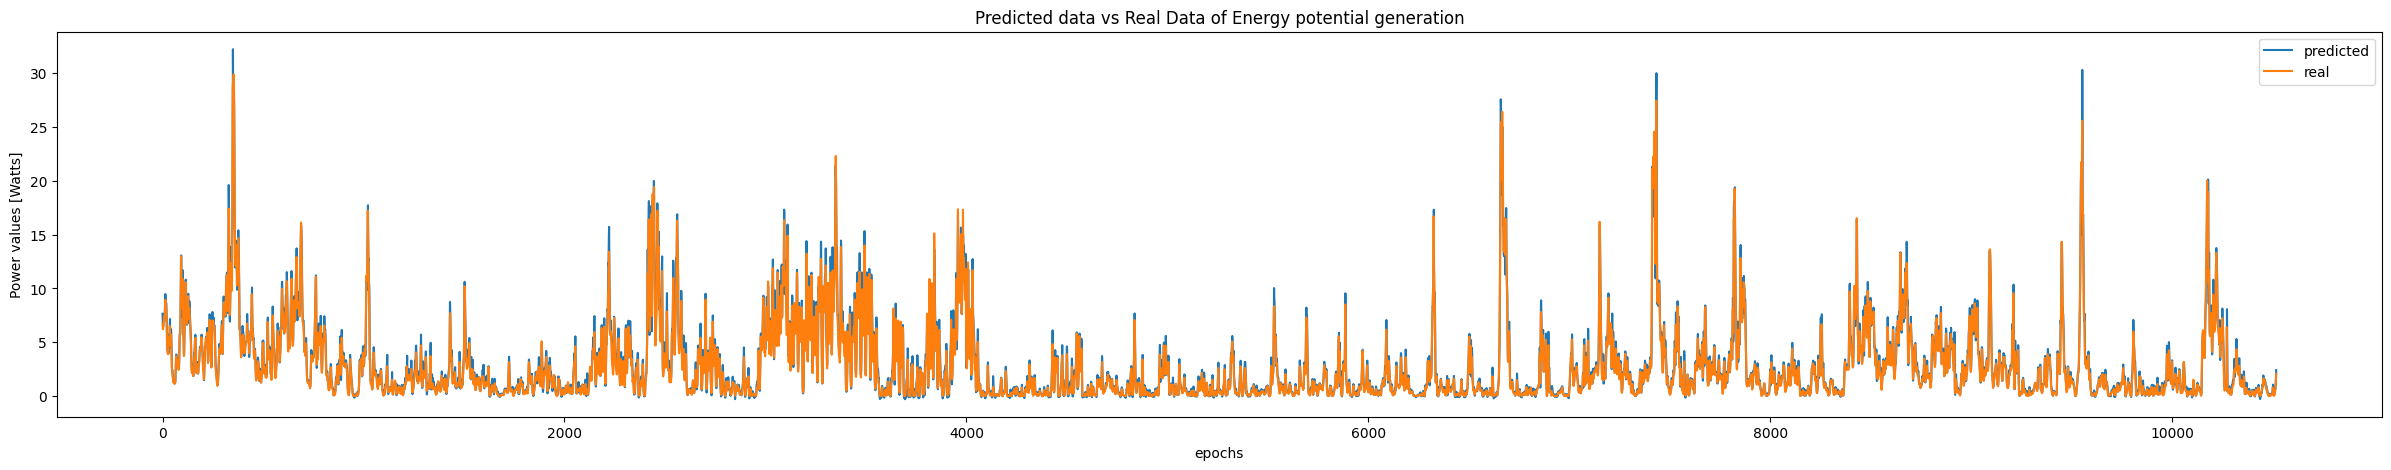

Text(0.5, 0, 'Error [%]')

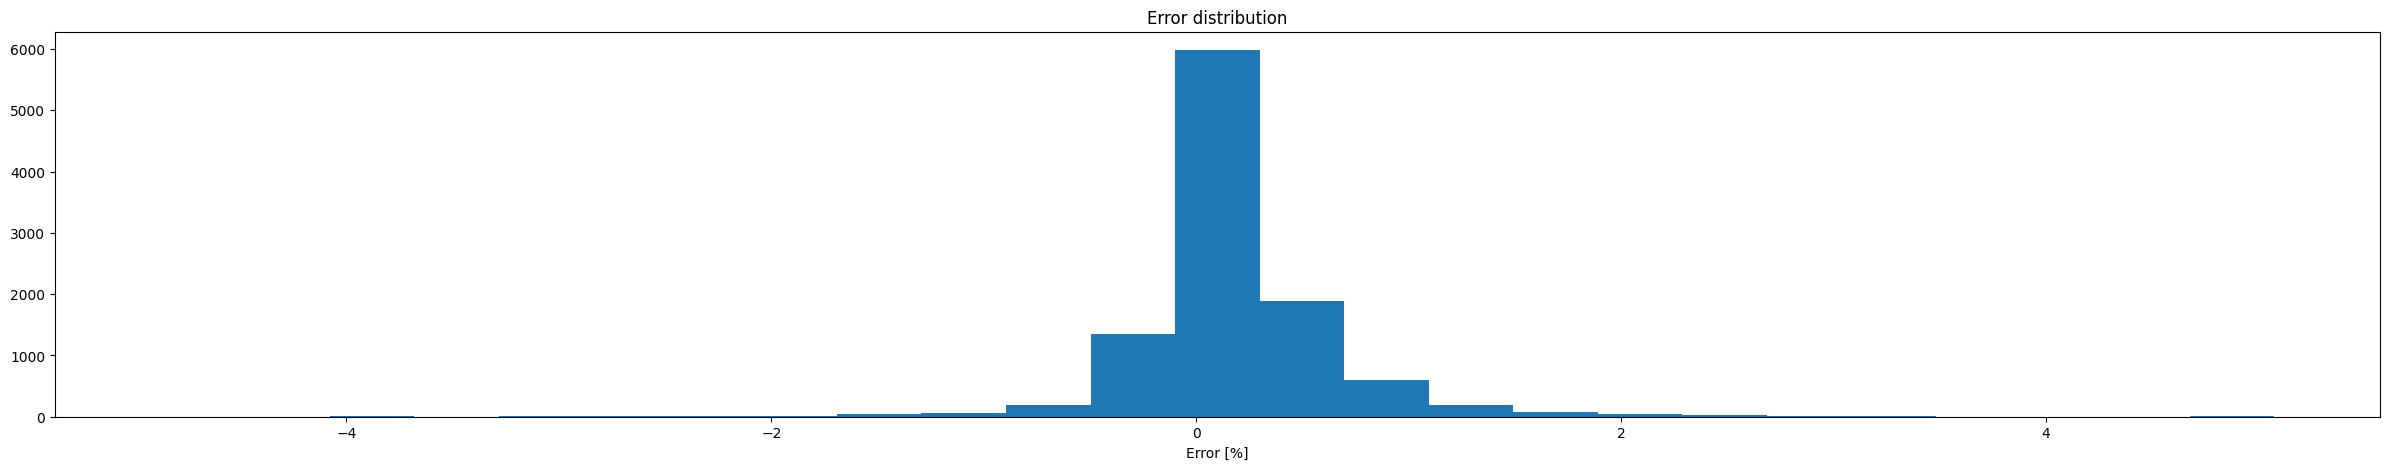

In [ ]:
#Making predictions
test_predictions = new_model.predict(dfeval_p).flatten()
plt.rcParams['figure.figsize'] = [30, 5]
plt.plot(test_predictions)
plt.plot(y_eval_p)
plt.xlabel("epochs")
plt.ylabel("Power values [Watts]")
plt.title("Predicted data vs Real Data of Energy potential generation")
plt.legend(["predicted","real"])
plt.show()

error = test_predictions - y_eval_p
plt.hist(error, bins = 25)
plt.title("Error distribution")
plt.xlabel("Error [%]")